## CONTENTS
### 1 Importing libraries
### 2 Importing data
### 3 Exploring customer variables relevant to profiling
#### 3.1 Age groups
#### 3.2 Dependants
#### 3.3 Customers with dependants and no dependants shopping in different departments
##### 3.3.1 Baby items department
### 4 Customer profiling using age and dependants groups
#### 4.1 Customer group shopping in baby items department
#### 4.2 Customer group and shopping frequency
### 5 Customer profiling using income
#### 5.1 Income group and shopping in different departments
#### 5.2 Income group and age
#### 5.3 Income group and shopping frequency
#### 5.4 Income group and expenditure
#### 5.5 Income group and US regions
### 6 Does popularity of different departments vary across US regions?
### 7 Brand loyalty
### 8 Exporting data

# 1 Importing libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2 Importing data

In [6]:
# Establish path
path = r'C:\Users\elena\Documents\02.2025 Instacart Basket Analysis'

In [8]:
# Import the big merged data file 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'normal_activity_customers.pkl'))

In [404]:
# Checking the existing variables 
ords_prods_merge.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'mean_price', 'spending_flag',
       'prior_order_days_median', 'frequentcustomer_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       '_merge', 'region', 'activity_flag'],
      dtype='object')

# 3 Exploring customer variables relevant to profiling

## 3.1 Age groups

In [9]:
# Categorizing customers into age groups
ords_prods_merge.loc[ords_prods_merge['age'] <25, 'age_group'] = 'Young adult'


In [10]:
ords_prods_merge.loc[(ords_prods_merge['age'] >= 25) & (ords_prods_merge['age'] < 40), 'age_group'] = 'Adult'

In [11]:
ords_prods_merge.loc[(ords_prods_merge['age'] >= 40) & (ords_prods_merge['age'] < 60), 'age_group'] = 'Middle-aged'

In [12]:
ords_prods_merge.loc[ords_prods_merge['age'] >= 60, 'age_group'] = 'Senior'

In [415]:
# Checking the frequency of age categories
ords_prods_merge['age_group'].value_counts(dropna=False)

age_group
Senior         10572857
Middle-aged     9723390
Adult           7248839
Young adult     3414601
Name: count, dtype: int64

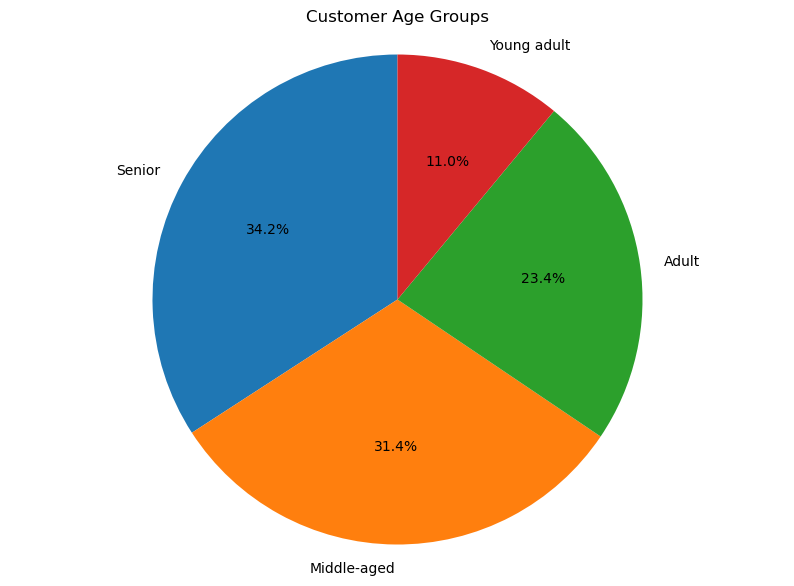

In [54]:
# Displaying the age categories using a pie chart
category_counts= ords_prods_merge['age_group'].value_counts(dropna=False)
fig3 = plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Age Groups')
plt.axis('equal') 
plt.show()

In [56]:
# Exporting the pie chart
fig3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_pie.png'))

The biggest age groups in the data base are middle-aged and seniors. From the age-income scattegram we saw that these are the age groups with the highest spending potential.

In [13]:
# We want age categories to be in a logical order on all charts
category_order = ['Young adult', 'Adult', 'Middle-aged', 'Senior']
ords_prods_merge['age_group'] = pd.Categorical(ords_prods_merge['age_group'], categories=category_order, ordered=True)

In [24]:
pivot_table = ords_prods_merge.pivot_table(values='income', index='age_group', aggfunc='mean')

C:\Users\elena\AppData\Local\Temp\ipykernel_21456\1769978838.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = ords_prods_merge.pivot_table(values='income', index='age_group', aggfunc='mean')


In [21]:
print(pivot_table)

                    income
age_group                 
Young adult   70739.869736
Adult         70567.374678
Middle-aged  113774.941285
Senior       115950.702648


In [26]:
# Saving age group vs income table
pivot_table.to_csv(os.path.join(path, '04 Analysis','Reports', 'agevsincome_table.csv'))

C:\Users\elena\AppData\Local\Temp\ipykernel_9112\1356760522.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig4 = sns.barplot(x=pivot_table.index, y=pivot_table['income'], palette='Blues')


Text(0, 0.5, 'Mean Income')

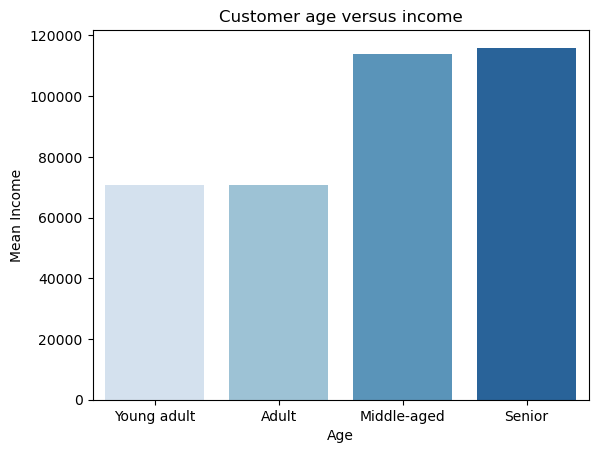

In [23]:
fig4 = sns.barplot(x=pivot_table.index, y=pivot_table['income'], palette='Blues')

# Add labels and title for seaborn plot
plt.title('Customer age versus income')
plt.xlabel('Age')
plt.ylabel('Mean Income')

In [27]:
# Exporting the age vs mean income bar chart
fig4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ageincome_bar1.png'), bbox_inches='tight')

The bar chart demonstrates that middle-aged and senior customers have higher income on average and thus have higher spending potential than young adults and adults. 

But do middle-aged and senior customers buy more of the expensive (high-range) products?

All the products in the database have been divided into three price range groups (see Exercise 4.7), which are illustrated below:

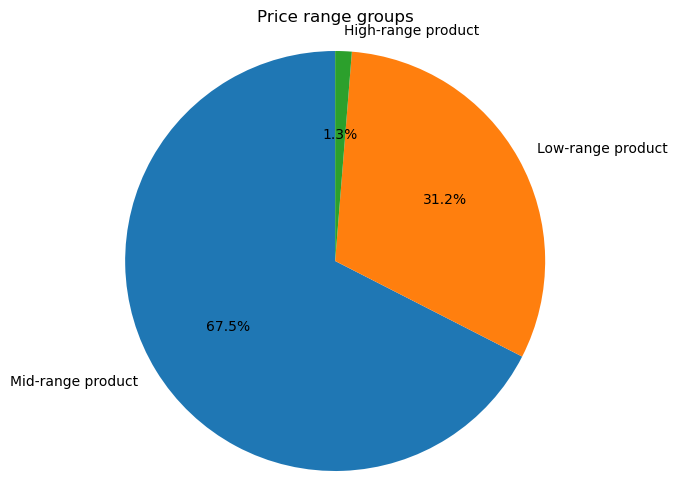

In [285]:
# Pie chart showing proportions of price range groups in the database
category_counts= ords_prods_merge['price_range_loc'].value_counts(dropna=False)
fig14 = plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Price range groups')
plt.axis('equal') 
plt.show()

In [287]:
fig14.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_loc.png'), bbox_inches='tight')

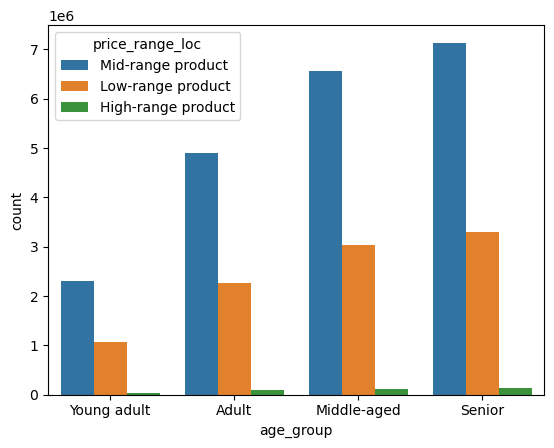

In [217]:
# Bar chart showing how many products of different price ranges are bought by customers from different age groups
clusterbar5 = sns.countplot(data=ords_prods_merge, x='age_group', hue='price_range_loc')

It appears from the bar chart that middle-aged and senior customers do buy more high-range products than the other two age groups, but there are more middle-aged and senior customers in the database and they buy more products in general, regardless of the price. Middle-aged and senior customers  do not appear to buy proportionaly more high end products than the other groups.

In [114]:
clusterbar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_prices.png'), bbox_inches='tight')

## 3.2 Dependants

In [30]:
# Dependent variable frequency distribution
ords_prods_merge['n_dependants'].value_counts(dropna=False)

n_dependants
3    7771309
0    7738508
2    7731924
1    7717946
Name: count, dtype: int64

In [20]:
# Defining dependents flag
ords_prods_merge.loc[ords_prods_merge['n_dependants'] == 0, 'dependants_flag'] = 'No dependants'
ords_prods_merge.loc[ords_prods_merge['n_dependants'] > 0, 'dependants_flag'] = 'Dependants'

In [33]:
ords_prods_merge['dependants_flag'].value_counts(dropna=False)

dependants_flag
Dependants       23221179
No dependants     7738508
Name: count, dtype: int64

The majority of customers have dependants

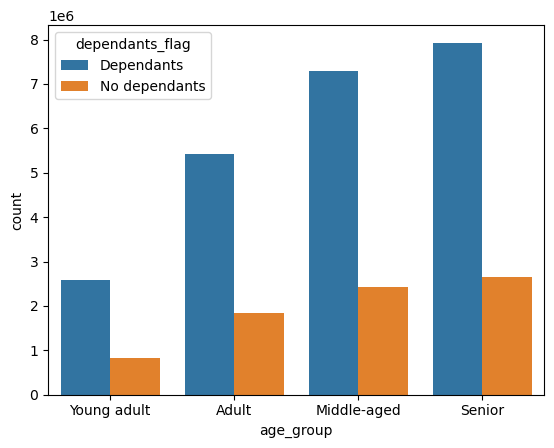

In [38]:
# Illustrating the relationship between dependants and age group
clusterbar2 = sns.countplot(data=ords_prods_merge, x='age_group', hue='dependants_flag')

People of all ages have dependants. Thos with dependants are likely to buy more groceries. 
Are people with dependents more likely to buy from certain departments?

In [43]:
clusterbar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependants.png'), bbox_inches='tight')

## 3.3 Customers with dependants and no dependants shopping in different departments

In [22]:
# To make the results easier to interpret, need to add department labels to the big datafile. Easiest way is to merge with the 'departments_wrangled' file
# Import departmemts datafile
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [423]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [24]:
# Renaming 'Unnamed' column
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [26]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [28]:
df_dept.dtypes

department_id     int64
department       object
dtype: object

In [30]:
ords_prods_merge['department_id'].dtypes

dtype('int64')

In [51]:
# Check the shape of the dataframes to be combined
ords_prods_merge.shape

(30959687, 34)

In [53]:
df_dept.shape

(21, 2)

In [32]:
# Drop the existing '_merge' column from the previous exercises
ords_prods_merge1 = ords_prods_merge.drop(['_merge'], axis =1)

In [34]:
# Merging the two dataframes
df_merged = ords_prods_merge1.merge(df_dept, on = 'department_id', indicator = True)

In [36]:
df_merged.shape

(30959687, 35)

In [177]:
df_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,...,marital_status,income,region,activity_flag,age_group,dependants_flag,baby_items_flag,customer_group,department,_merge
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,...,married,98119,West,Normal activity,Middle-aged,Dependants,Other items,Middle-aged-Dependants,dairy eggs,both
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,...,married,98119,West,Normal activity,Middle-aged,Dependants,Other items,Middle-aged-Dependants,produce,both
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,...,married,98119,West,Normal activity,Middle-aged,Dependants,Other items,Middle-aged-Dependants,pantry,both
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,...,married,98119,West,Normal activity,Middle-aged,Dependants,Other items,Middle-aged-Dependants,pantry,both
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,...,married,98119,West,Normal activity,Middle-aged,Dependants,Other items,Middle-aged-Dependants,pantry,both


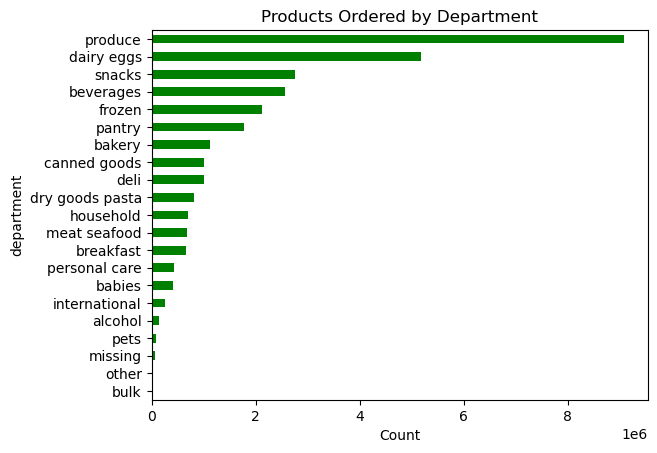

In [181]:
# Departments bar chart
depts_bar = df_merged['department'].value_counts(ascending=True).plot(kind='barh', color='green', xlabel = 'Count', title='Products Ordered by Department')

In [185]:
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments.png'), bbox_inches='tight')

In general, Instacart customers buy the biggest number of products from produce department, followed by dairy/eggs departments. Do all customer groups shop in the same way?

In [193]:
# Illustrating the relationship between dependants and popular departments
# Create crosstab
dependants_dept_cross = pd.crosstab(df_merged['department'], df_merged['dependants_flag'], dropna = False)
dependants_dept_cross


dependants_flag,Dependants,No dependants
department,,
alcohol,107800,36827
babies,307064,103328
bakery,839433,281395
beverages,1926560,645341
breakfast,504418,166432
bulk,25451,8000
canned goods,761054,251020
dairy eggs,3879102,1293203
deli,750452,253382


Text(0, 0.5, 'department')

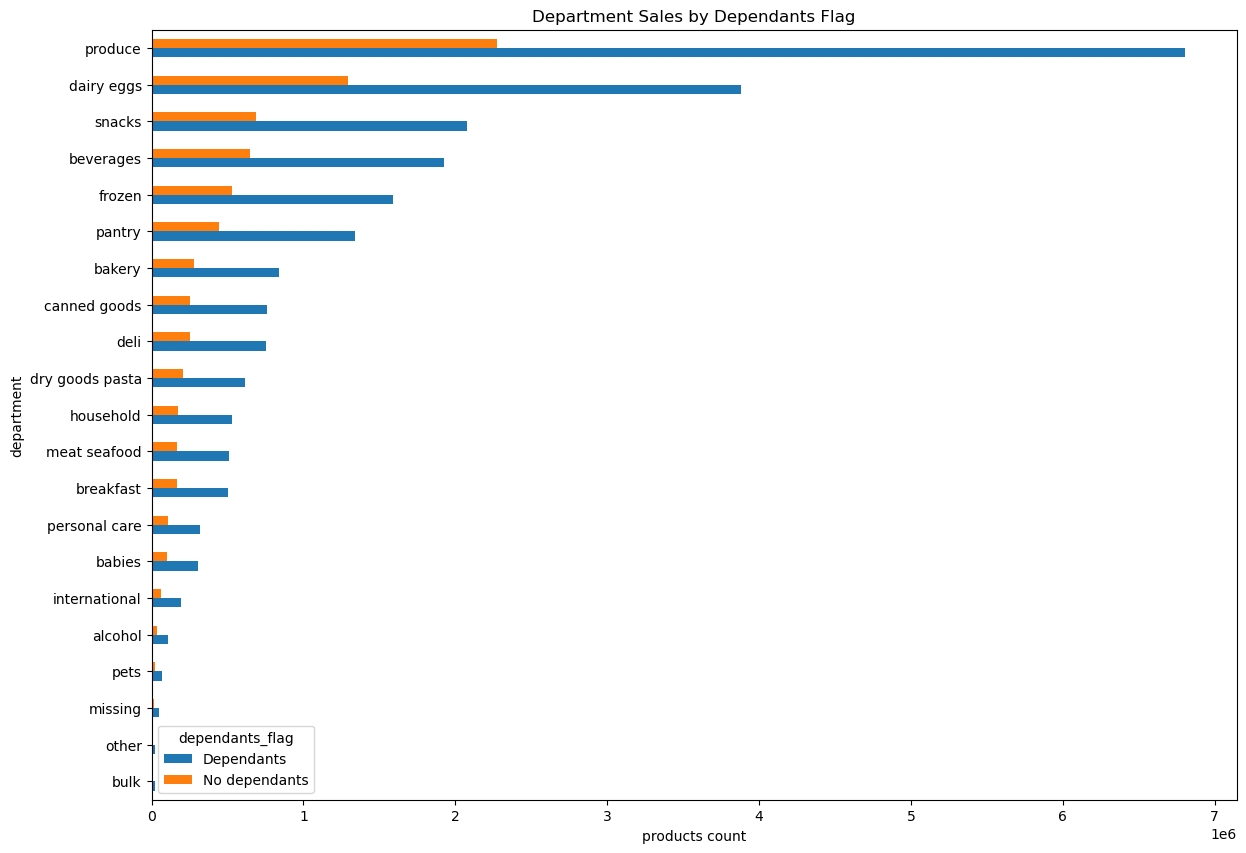

In [201]:
# Create bar chart
dependants_dept_bar = dependants_dept_cross.sort_values('Dependants').plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Dependants Flag')
plt.xlabel('products count')
plt.ylabel('department')


People with dependents and no dependents show similar patterns of buying from various depatments, with the biggest number of products purchased from produce, dairy & eggs and snacks. 

In [204]:
dependants_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_dependants.png'), bbox_inches='tight')

### 3.3.1 Baby items department

In [27]:
# Do people with dependants buy the majority of baby items (department_id = 18)?
# Separating baby items from other items
result = []

for value in ords_prods_merge['department_id']:
  if value == 18:
    result.append('Baby items')
  else:
    result.append('Other items')

In [29]:
# Defining the 'baby_items_flag' column
ords_prods_merge['baby_items_flag'] = result

In [31]:
# Checking the values in the new column
ords_prods_merge['baby_items_flag'].value_counts(dropna=False)

baby_items_flag
Other items    30549295
Baby items       410392
Name: count, dtype: int64

In [233]:
# Who is buying the baby items? Let's create a separate dataframe for them
df_baby = ords_prods_merge[ords_prods_merge['department_id'] == 18]

In [234]:
df_baby.shape

(410392, 34)

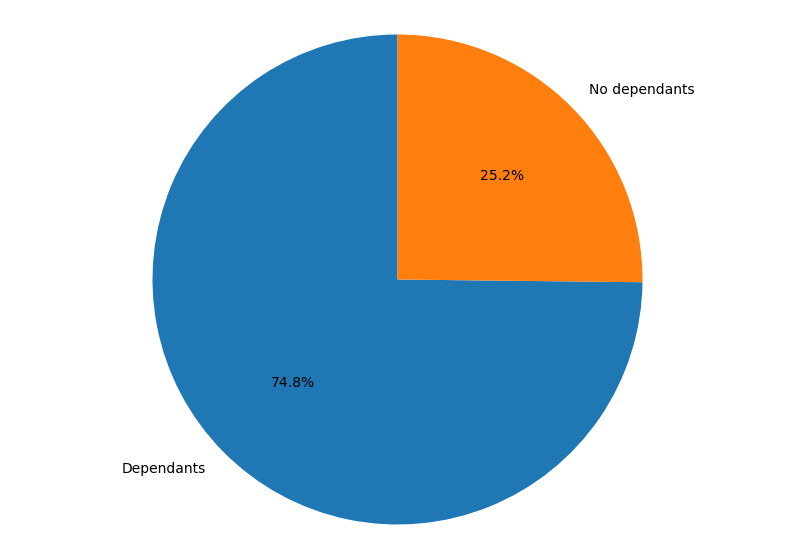

In [247]:
# Displaying in a pie chart who is buying the baby items
category_counts= df_baby['dependants_flag'].value_counts(dropna=False)
fig5 = plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.show()


The majority of baby items are purchased by customers with dependants, presumably with children. However, a quarter of baby item purchases is made by people with no dependants. Perhaps grandparents buying items for their grandchildren. Thus baby items should not be exclusively advertised to customers with children. 

In [53]:
# Exporting the baby items pie chart
fig5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'babyitems_dependants_pie.png'), bbox_inches='tight')

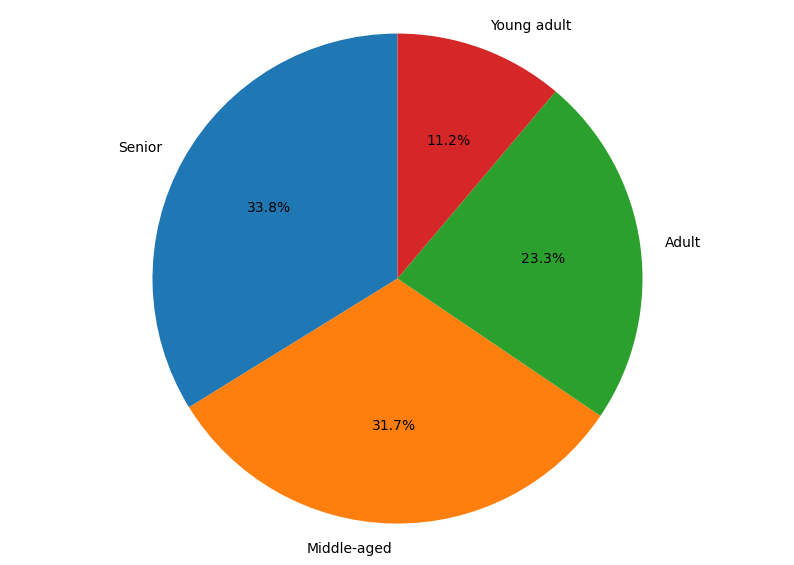

In [55]:
# Displaying in a pie chart - do certain age groups buy more baby items?
category_counts= df_baby['age_group'].value_counts(dropna=False)
fig6 = plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.show()

In [57]:
# Exporting the baby items vs age pie chart
fig6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'babyitems_age_pie.png'), bbox_inches='tight')

Surprisingly the biggest percentage of baby items is purchased by seniors. Young adults are least likely to buy baby items. Thus advertising for baby items should be targeted at senior and middle-aged customers. 

# 4 Customer profiling using age and dependants groups 

In [38]:
# Combining age group and dependants flag into one variable to define customer profiles
df_merged['customer_group'] = df_merged.apply(lambda row: f"{row['age_group']}-{row['dependants_flag']}", axis=1)

In [67]:
df_merged['customer_group'].value_counts(dropna=False)

customer_group
Senior-Dependants            7928026
Middle-aged-Dependants       7289915
Adult-Dependants             5414009
Senior-No dependants         2644831
Young adult-Dependants       2589229
Middle-aged-No dependants    2433475
Adult-No dependants          1834830
Young adult-No dependants     825372
Name: count, dtype: int64

In [40]:
# Customer groups should be in a logical order on all charts and tables
category_order = ['Young adult-No dependants', 'Adult-No dependants', 'Middle-aged-No dependants', 'Senior-No dependants', 'Young adult-Dependants', 'Adult-Dependants', 'Middle-aged-Dependants', 'Senior-Dependants']
df_merged['customer_group'] = pd.Categorical(df_merged['customer_group'], categories=category_order, ordered=True)

In [74]:
df_merged['customer_group'].value_counts(dropna=False)

customer_group
Senior-Dependants            7928026
Middle-aged-Dependants       7289915
Adult-Dependants             5414009
Senior-No dependants         2644831
Young adult-Dependants       2589229
Middle-aged-No dependants    2433475
Adult-No dependants          1834830
Young adult-No dependants     825372
Name: count, dtype: int64

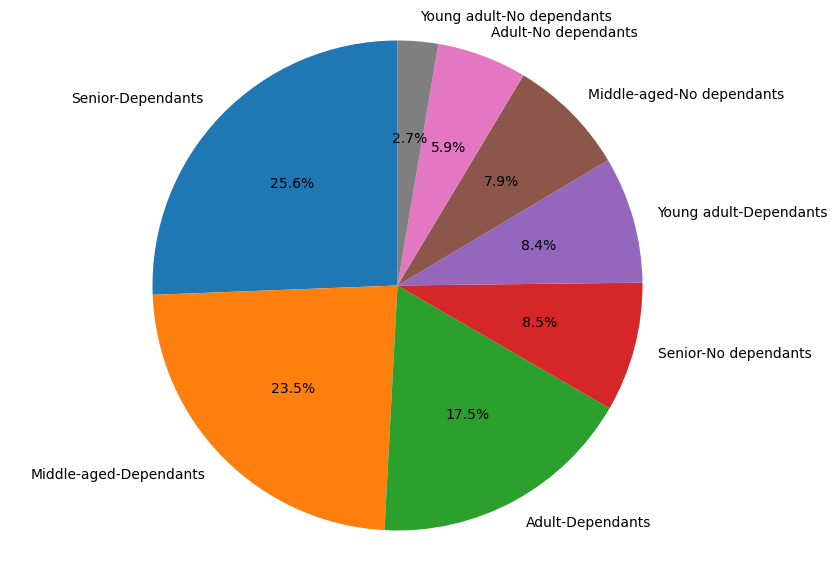

In [384]:
# Illustrating the customer groups in the database
category_counts= df_merged['customer_group'].value_counts(dropna=False)
fig10 = plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.show()

The smallest customer groups are young adults and adults with no dependents. The biggest customer groups are seniors and middle-aged adults and adults with dependents, as we'll see from the figure below, these are also the groups that buy most baby products, so the dependents are probably mostly children. So the decisions about prodcuts, marketing strategies and promotions should be done in mind of the majority customer base being adults with children in the household. 

In [386]:
# Exporting the baby items vs customer group pie chart
fig10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_pie.png'), bbox_inches='tight')

## 4.1 Customer group shopping in baby items department 

In [73]:
# Let's see how the customer group relates to buying baby items
df_baby = df_merged[ords_prods_merge['department_id'] == 18]

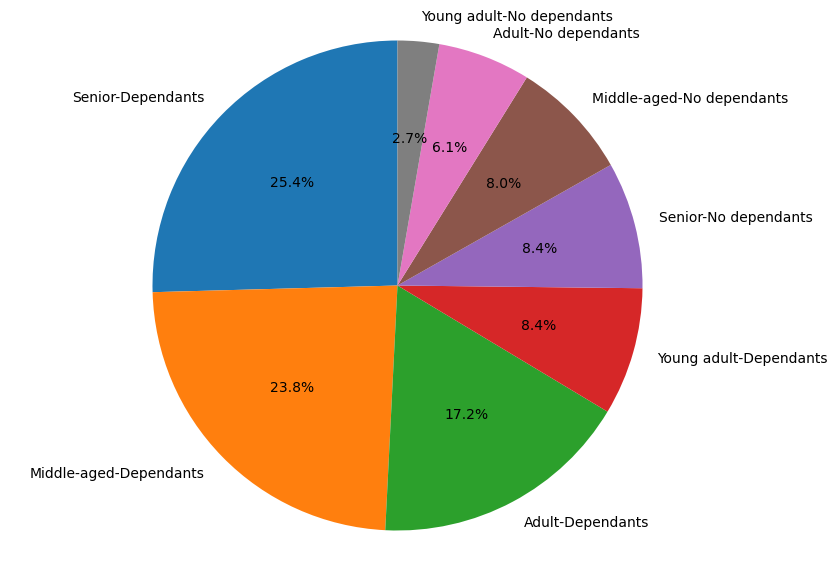

In [75]:
# Displaying in a pie chart - baby items purchased by different customer groups 
category_counts= df_baby['customer_group'].value_counts(dropna=False)
fig7 = plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.show()

We can see how different proportions of baby items are bought by different customer groups. It's interesting how seniors with dependents buy most baby items out of customers with dependents and seniors with no dependants buy most baby items out of customers with no dependants. 

In [80]:
# Exporting the baby items vs customer group pie chart
fig7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'babyitems_customer_pie.png'), bbox_inches='tight')

## 4.2 Customer group and shopping frequency

In [124]:
# Customer group descriptive statistics for frequency of use

df_merged.groupby('customer_group').agg({'days_since_prior_order': ['min', 'max', 'mean', 'std', 'median']}).round(2)

C:\Users\elena\AppData\Local\Temp\ipykernel_21456\328119263.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby('customer_group').agg({'days_since_prior_order': ['min', 'max', 'mean', 'std', 'median']}).round(2)


days_since_prior_order                          
                                             min   max   mean   std median
customer_group                                                            
Young adult-No dependants                    0.0  30.0  10.94  8.65    8.0
Adult-No dependants                          0.0  30.0  10.88  8.58    8.0
Middle-aged-No dependants                    0.0  30.0  10.72  8.54    7.0
Senior-No dependants                         0.0  30.0  10.75  8.59    7.0
Young adult-Dependants                       0.0  30.0  10.71  8.53    7.0
Adult-Dependants                             0.0  30.0  10.82  8.55    7.0
Middle-aged-Dependants                       0.0  30.0  10.85  8.60    8.0
Senior-Dependants                            0.0  30.0  10.82  8.59    7.0

The day_since_prior_order data is right skewed. Median would be a better indicator of central tendency for this variable.  
There is only a small difference in order frequency between different customer groups. Middle-aged people with dependents and adults and young adults with no dependents tend to order less frequently than others. 

In [42]:
df_merged['frequentcustomer_flag'].value_counts(dropna=False)

frequentcustomer_flag
Frequent customer        21201352
Regular customer          6863933
Non-frequent customer     2894402
Name: count, dtype: int64

In [44]:
# Are there more frequent customers in one particular customer group than the other groups?

In [46]:
# Create crosstab customer group vs frequentcustomer_flag
frequency_customer_cross = pd.crosstab(df_merged['customer_group'], df_merged['frequentcustomer_flag'], dropna = False)

Text(0.5, 0, 'count')

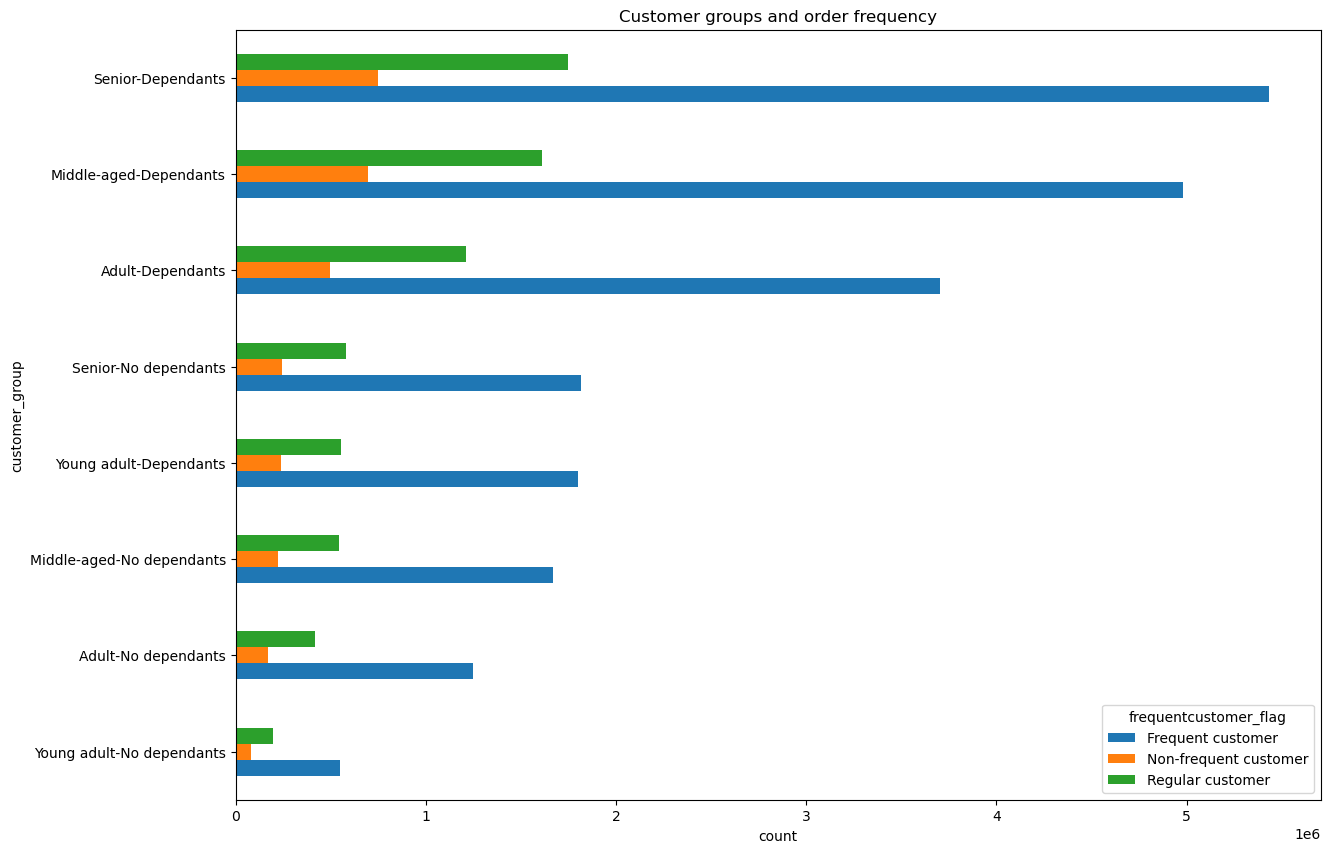

In [48]:
# Create bar chart
frequency_customer_bar = frequency_customer_cross.sort_values('Frequent customer').plot(kind = 'barh', figsize=(14,10))
plt.title('Customer groups and order frequency')
plt.xlabel('count')


In all customer groups the majority of customers are frequent customers. there might be some differences in proporitons between frequent customer and non-frequent customers within each profile, but no profile is distiguished by having few frequent customers. 

In [201]:
frequency_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_dept_bar.png'), bbox_inches='tight')

In [50]:
# Are there more loyal customers in one particular customer group than the other groups?

# Let's organize the loyalty group variable
category_order = ['New customer', 'Regular customer', 'Loyal customer']
df_merged['loyalty_flag'] = pd.Categorical(df_merged['loyalty_flag'], categories=category_order, ordered=True)

In [328]:
# Create customer group vs loyalty group crosstab
loyalty_customer_cross = pd.crosstab(df_merged['customer_group'], df_merged['loyalty_flag'], dropna = False)

Text(0.5, 0, 'count')

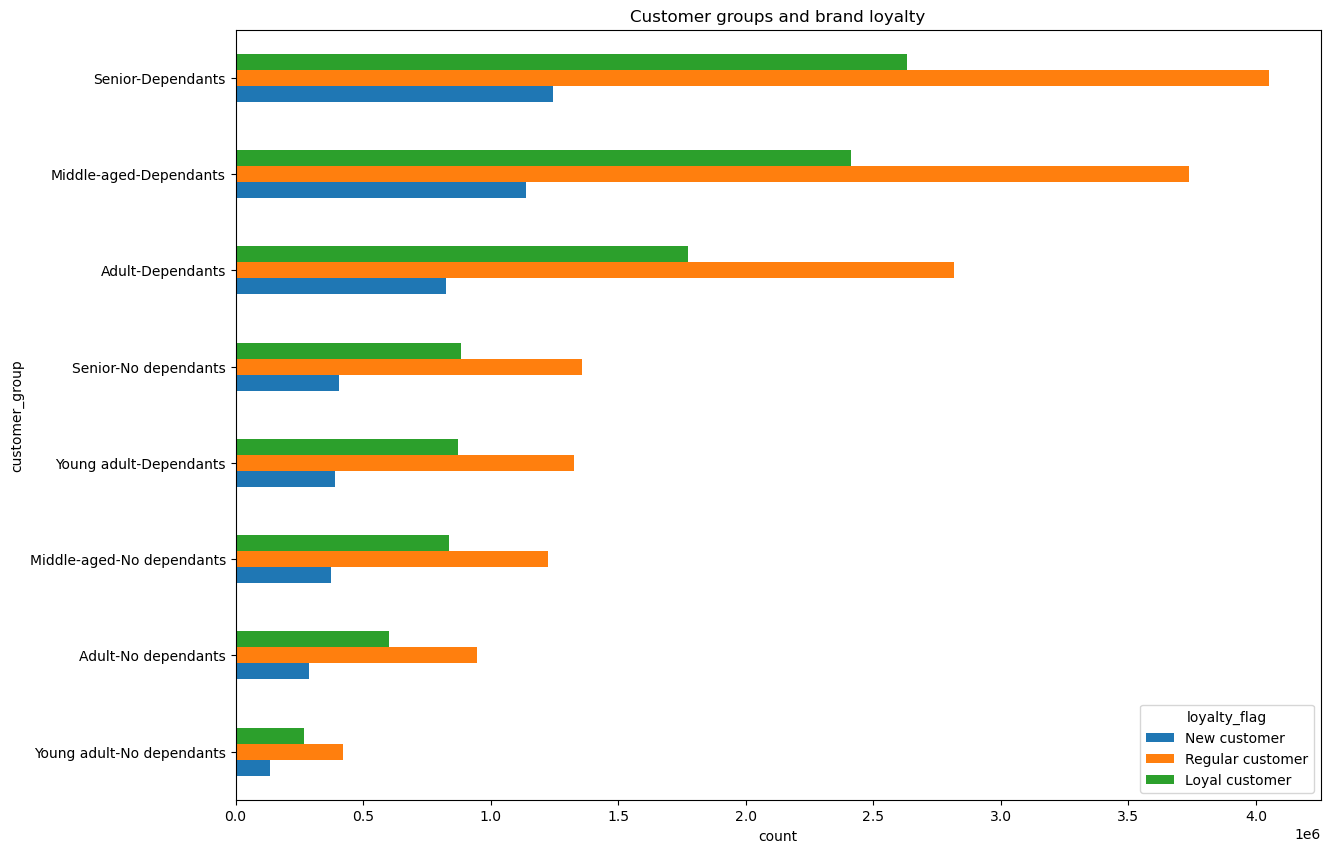

In [330]:
# Create bar chart
loyalty_customer_bar = loyalty_customer_cross.sort_values('Regular customer').plot(kind = 'barh', figsize=(14,10))
plt.title('Customer groups and brand loyalty')
plt.xlabel('count')

All customer groups have regular customers as the majority, followed by loyal customers. The proportions might be slightly different but the general pattern is the same or all groups.

In [326]:
loyalty_customer_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_customer_bar.png'), bbox_inches='tight')

In [95]:
# Previously median value for days since prior order was calculated for each customer. 
df_merged.groupby('customer_group').agg({'prior_order_days_median': ['min', 'max', 'mean', 'std', 'median']})

C:\Users\elena\AppData\Local\Temp\ipykernel_21456\1242322103.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby('customer_group').agg({'prior_order_days_median': ['min', 'max', 'mean', 'std', 'median']})


prior_order_days_median                             \
                                              min   max       mean       std   
customer_group                                                                 
Young adult-No dependants                     0.0  30.0  10.130379  6.707872   
Adult-No dependants                           0.0  30.0  10.007266  6.641131   
Middle-aged-No dependants                     0.0  30.0   9.884550  6.650821   
Senior-No dependants                          0.0  30.0   9.874505  6.650286   
Young adult-Dependants                        0.0  30.0   9.842277  6.631138   
Adult-Dependants                              0.0  30.0   9.952437  6.608548   
Middle-aged-Dependants                        0.0  30.0  10.001696  6.692211   
Senior-Dependants                             0.0  30.0   9.976213  6.702707   

                                  
                          median  
customer_group                    
Young adult-No dependants    8.0  
Adult-No dependants          7.0  
Middle-aged-No dependants    7.0  
Senior-No dependants         7.0  
Young adult-Dependants       7.0  
Adult-Dependants             7.0  
Middle-aged-Dependants       7.5  
Senior-Dependants            7.0

## 4.3 Customer group and expenditure

In [98]:
# Creating 'order_total' column indicating the total price for each order based on prices and grouped by order id
df_merged['order_total'] = df_merged.groupby(['order_id'])['prices'].transform('sum')

In [100]:
df_merged['order_total'].describe()

count    3.095969e+07
mean     1.222303e+02
std      7.535002e+01
min      1.000000e+00
25%      6.690000e+01
50%      1.077000e+02
75%      1.619000e+02
max      1.092200e+03
Name: order_total, dtype: float64

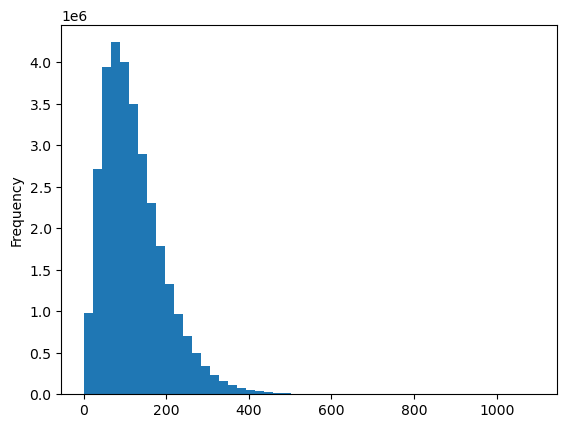

In [112]:
# Plotting historam for 'order_total' column to determine the shape of the distribution
hist_totals=df_merged['order_total'].plot.hist(bins = 50)

In [122]:
# Customer group descriptive statistics for order totals

df_merged.groupby('customer_group').agg({'order_total': ['min', 'max', 'mean', 'std', 'median']}).round(2)

C:\Users\elena\AppData\Local\Temp\ipykernel_21456\2626024894.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby('customer_group').agg({'order_total': ['min', 'max', 'mean', 'std', 'median']}).round(2)


order_total                              
                                  min     max    mean    std median
customer_group                                                     
Young adult-No dependants         1.0   621.2  119.35  72.06  105.8
Adult-No dependants               1.0   624.3  123.07  75.90  108.2
Middle-aged-No dependants         1.0   712.0  121.00  74.63  106.4
Senior-No dependants              1.0   875.0  122.43  75.26  108.2
Young adult-Dependants            1.0   842.1  123.08  75.85  108.6
Adult-Dependants                  1.0   829.2  123.31  76.34  108.4
Middle-aged-Dependants            1.0  1092.2  122.22  75.80  107.7
Senior-Dependants                 1.0   787.0  121.64  74.53  107.4

Since the data is right skewed, median might be the more reliable measure of central tendency. Median order-total is the highest for young adults with dependents. However, the differences in averages between the groups are very small. There is a big amount of variation in the money spent per order. Thus looking at order totals might not be the best indicator of which group is spending most money on Instacart products.   

An existing variable in the data base is average price per customer. It could show if some customers tend to buy more expensive items than others.  

In [52]:
# Customer group descriptive statistics for mean_price column
df_merged.groupby('customer_group').agg({'mean_price': ['min', 'max','mean', 'std', 'median']}).round(2)

C:\Users\elena\AppData\Local\Temp\ipykernel_4184\1882105777.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby('customer_group').agg({'mean_price': ['min', 'max','mean', 'std', 'median']}).round(2)


mean_price                          
                                 min    max  mean   std median
customer_group                                                
Young adult-No dependants       2.10  14.76  7.77  0.73   7.81
Adult-No dependants             1.80  13.40  7.78  0.71   7.81
Middle-aged-No dependants       1.00  16.29  7.79  0.73   7.80
Senior-No dependants            1.31  16.93  7.80  0.72   7.82
Young adult-Dependants          2.00  14.90  7.80  0.72   7.82
Adult-Dependants                1.00  15.00  7.78  0.72   7.80
Middle-aged-Dependants          1.50  20.11  7.79  0.73   7.82
Senior-Dependants               1.26  19.40  7.79  0.72   7.82

There is practically no difference in the mean price of products bought by customer between the customer groups. Thus no one particular group shows a tendency to buy more cheap or more expensive items. 

Dividing customers into groups by age and having dependants does not seem  very beneficial for answering stakeholders questions. A different way of profiling the customers will be explored next. 

# 5 Customer profiling using income 

Another way of profiling the customers is by their income, since it indicates their spending potential.

In [54]:
# Defining income groups
df_merged.loc[df_merged['income'] <=100000, 'income_group'] = 'Low earner'
df_merged.loc[(df_merged['income'] <=200000) & (df_merged['income'] > 100000), 'income_group'] = 'Medium earner'
df_merged.loc[df_merged['income'] > 200000, 'income_group'] = 'High earner'

In [134]:
df_merged['income_group'].value_counts(dropna=False)

income_group
Low earner       16757273
Medium earner    13950823
High earner        251591
Name: count, dtype: int64

In [56]:
# Income groups should be in a logical order on all charts and tables
category_order = ['High earner', 'Medium earner', 'Low earner']
df_merged['income_group'] = pd.Categorical(df_merged['income_group'], categories=category_order, ordered=True)

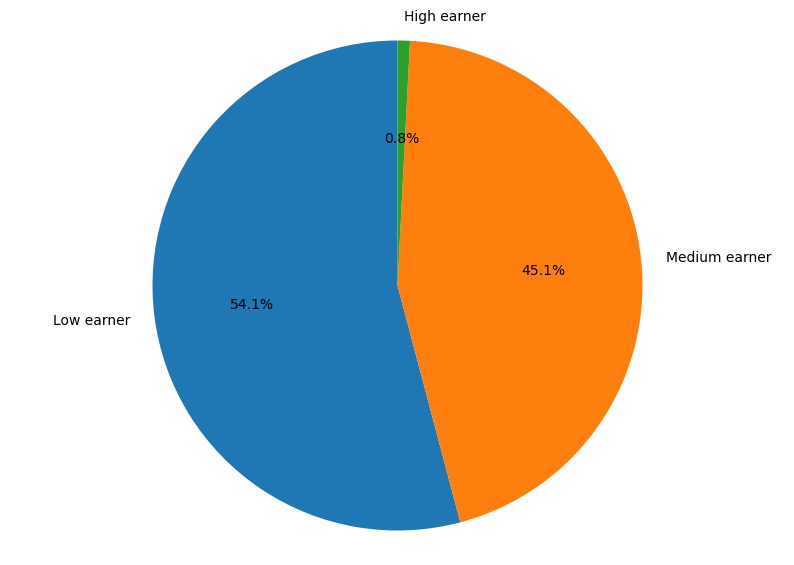

In [388]:
# Pie chart for the income groups
category_counts= df_merged['income_group'].value_counts(dropna=False)
fig11 = plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.show()

In [390]:
fig11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_pie.png'), bbox_inches='tight')

## 5.1 Income group and shopping in different departments

In [144]:
# Illustrating the relationship between income and popular departments
# Create crosstab
income_dept_cross = pd.crosstab(df_merged['department'], df_merged['income_group'], dropna = False)
income_dept_cross

income_group,High earner,Medium earner,Low earner
department,,,
alcohol,6127,63015,75485
babies,2104,194592,213696
bakery,12604,515099,593125
beverages,24661,1101776,1445464
breakfast,6529,291065,373256
bulk,27,14191,19233
canned goods,9089,476137,526848
dairy eggs,41756,2359790,2770759
deli,7308,454781,541745


Text(0, 0.5, 'department')

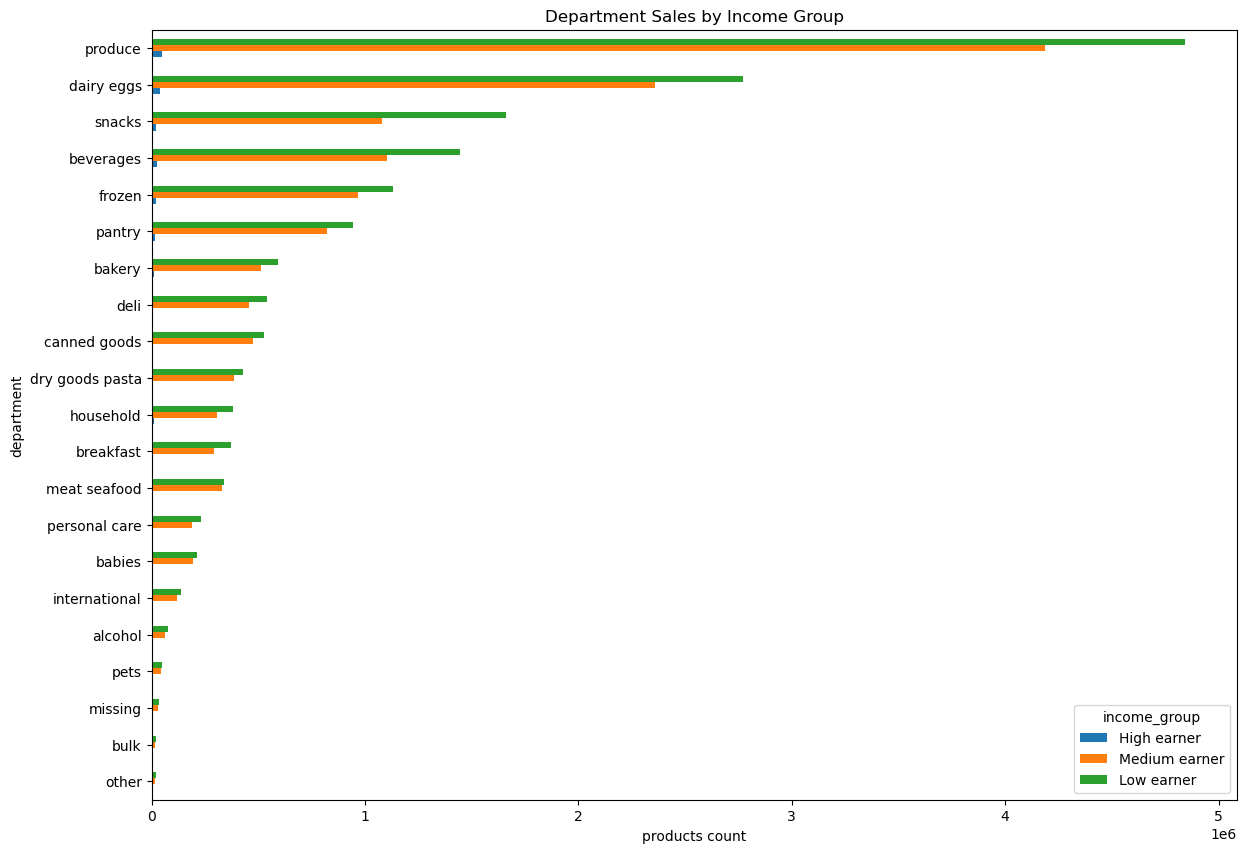

In [145]:
# Create bar chart
income_dept_bar = income_dept_cross.sort_values('Low earner').plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('department')

In [148]:
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_income_gr.png'), bbox_inches='tight')

## 5.2 Income group and age

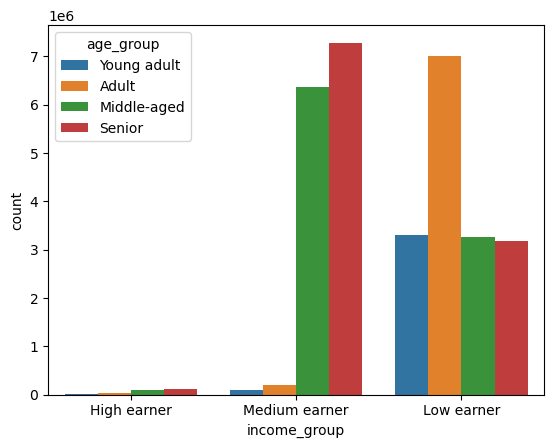

In [227]:
# Bar chart to illustrate the relationship between age and income
clusterbar7 = sns.countplot(data=df_merged, x='income_group', hue='age_group')

Low earners are mostly adults 25-40 years of age, while the vast majority of medium earners are middle-aged and senior people. Most high earners are also middle-aged and older but there are a few young adults and adults.

In [159]:
clusterbar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_gr_age.png'), bbox_inches='tight')

## 5.3 Income group and shopping frequency

In [162]:
# Income group descriptive statistics for use frequency

df_merged.groupby('income_group').agg({'days_since_prior_order': ['min', 'max', 'mean', 'std', 'median']}).round(2)

C:\Users\elena\AppData\Local\Temp\ipykernel_21456\3232304357.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby('income_group').agg({'days_since_prior_order': ['min', 'max', 'mean', 'std', 'median']}).round(2)


days_since_prior_order                          
                                 min   max   mean   std median
income_group                                                  
High earner                      0.0  30.0  10.08  8.17    7.0
Medium earner                    0.0  30.0  10.78  8.58    7.0
Low earner                       0.0  30.0  10.84  8.58    7.0

Median is a better indicator of the average in this case. There are no differences in median number of days since prior order between the income groups. This suggests that the groups do not differ in how frequently they make orders at Instacart. 

Another way of looking at this issue is to compare groups on the number of frequent customers.

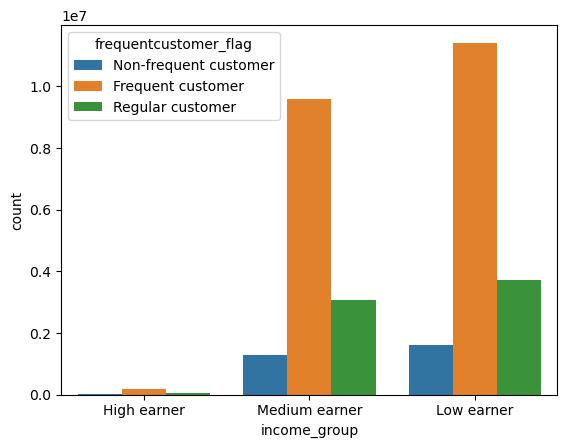

In [166]:
# Bar chart to illustrate the relationship between income group and frequentcustomer_flag

clusterbar9 = sns.countplot(data=df_merged, x='income_group', hue='frequentcustomer_flag')

In [168]:
clusterbar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_gr_frequentcustomer.png'), bbox_inches='tight')

Most frequent customers are low learners, but close second are medium earners. There are fewer regular customers, but similarly they are mostly low earners, followed by medium earners. 

## 5.4 Income group and expenditure

In [172]:
# Income group descriptive statistics for order totals

df_merged.groupby('income_group').agg({'order_total': ['min', 'max', 'mean', 'std', 'median']}).round(2)

C:\Users\elena\AppData\Local\Temp\ipykernel_21456\1300262811.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby('income_group').agg({'order_total': ['min', 'max', 'mean', 'std', 'median']}).round(2)


order_total                              
                      min     max    mean    std median
income_group                                           
High earner           1.0  1047.4  134.62  86.15  116.4
Medium earner         1.0  1092.2  126.26  74.97  112.2
Low earner            1.0   875.0  118.69  75.31  103.9

High earners tend to spend more on average per order than medium or low earners, and medium earners spend more than low earners. Thus high earners are very valuable customers and need to be encouraged to shop more through marketing and promotions.

In [176]:
# Income group descriptive statistics for mean_price coloumn
df_merged.groupby('income_group').agg({'mean_price': ['min', 'max','mean', 'std', 'median']}).round(2)

C:\Users\elena\AppData\Local\Temp\ipykernel_21456\3540522823.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby('income_group').agg({'mean_price': ['min', 'max','mean', 'std', 'median']}).round(2)


mean_price                          
                     min    max  mean   std median
income_group                                      
High earner         4.37  10.55  7.78  0.60   7.79
Medium earner       4.43  20.11  7.96  0.56   7.90
Low earner          1.00  18.23  7.65  0.81   7.72

Surpririsingly, it is medium rather than high earners that tend to pay more on average per item. Although the differences between groups are quite small.

Another way to look at this issue is to examine which group buys more of the high price products using the price_range_loc variable.

In [322]:
df_merged['price_range_loc'].value_counts(dropna=False)

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      393076
Name: count, dtype: int64

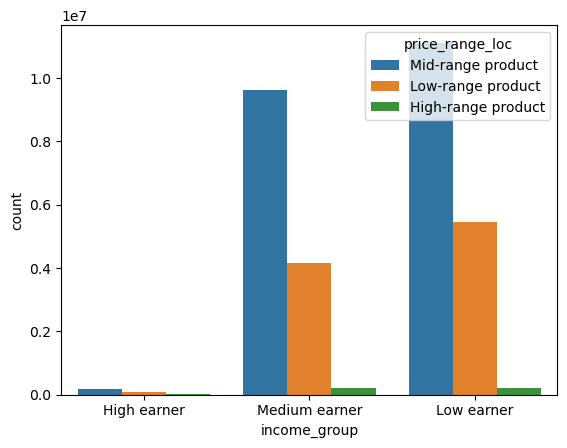

In [180]:
# Bar chart to compare the income groups on the amount of different price range products that they buy
clusterbar10 = sns.countplot(data=df_merged, x='income_group', hue='price_range_loc')

There are very few high earning customers. Thus, even though they have the spending potential, the reality is that the majority of high-range products are bought by low and medium earners. Therefore, high range products needs to be advertized to customers of all spending potential. For best marketing strategies, it is best to focus on customers' personal shopping history and advertise high-range products to customers who bought them in the past.

In [183]:
clusterbar10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_gr_price_flag.png'), bbox_inches='tight')

## 5.5 Income group and US regions

In [186]:
# Create region vs income group crosstab
income_region_cross = pd.crosstab(df_merged['region'], df_merged['income_group'], dropna = False)
income_region_cross

income_group,High earner,Medium earner,Low earner
region,,,
Midwest,63502,3335472,3861332
Northeast,39681,2476034,2948167
South,82574,4579383,5647485
West,65834,3559934,4300289


Text(0, 0.5, 'Region')

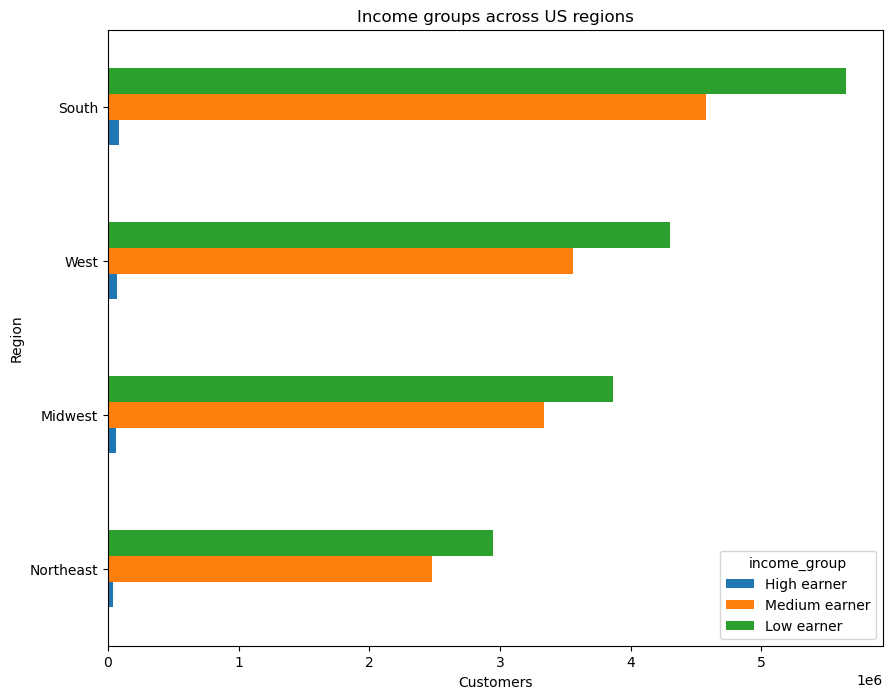

In [194]:
# Create region vs income group bar chart
income_region_bar = income_region_cross.sort_values('Low earner').plot(kind = 'barh', figsize=(10,8))
plt.title('Income groups across US regions')
plt.xlabel('Customers')
plt.ylabel('Region')

In every region, the biggest customer group are low earners, followed by medium earners and the smallest customer group are high earners. There seem to be proportionally more medium earners in the Midwest than the general pattern. 

In [203]:
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_bar.png'), bbox_inches='tight')

# 6 Does popularity of different departments vary across US regions?

In [199]:
# Create crosstab regions vs departments
region_dept_cross = pd.crosstab(df_merged['department'], df_merged['region'], dropna = False)

Text(0, 0.5, 'Region')

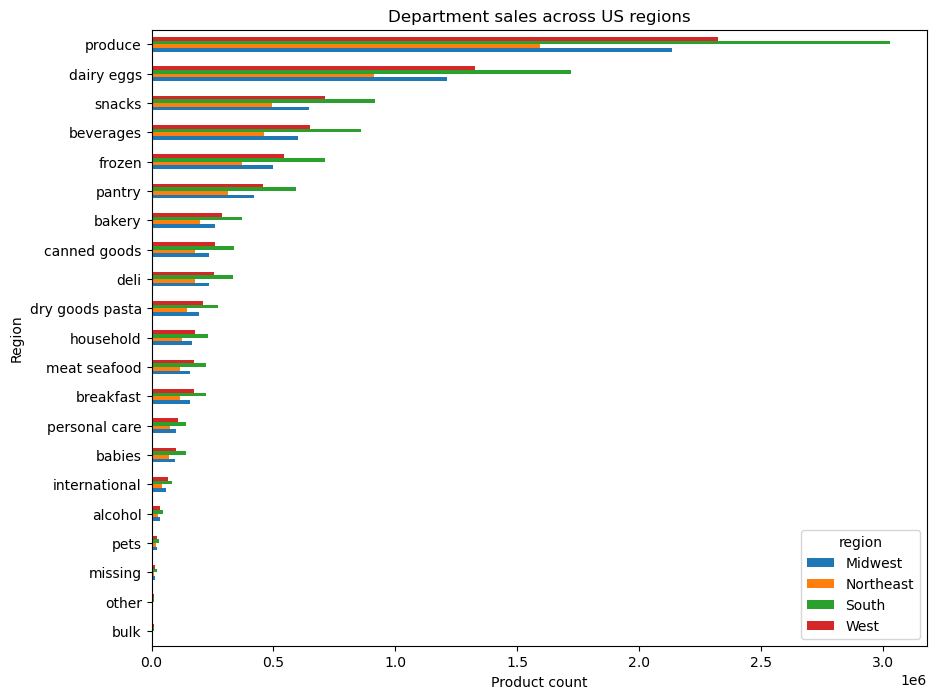

In [208]:
# Create regions vs departments bar chart
region_dept_bar = region_dept_cross.sort_values('South').plot(kind = 'barh', figsize=(10,8))
plt.title('Department sales across US regions')
plt.xlabel('Product count')
plt.ylabel('Region')

The pattern of spending across departments looks very similar across the four US regions. Therefore, the same marketing campaigns can be run across the coutry. 

In [211]:
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dept_bar.png'), bbox_inches='tight')

# 7 Brand loyalty

In [337]:
# Checking the 'loyalty_flag' variable
df_merged['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    15874128
Loyal customer      10282763
New customer         4802796
Name: count, dtype: int64

In [363]:
# Do loyal customers make purchases more frequently than new or regular customers?

C:\Users\elena\AppData\Local\Temp\ipykernel_21456\2470771936.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_medians = df_merged.groupby('loyalty_flag')['days_since_prior_order'].median()


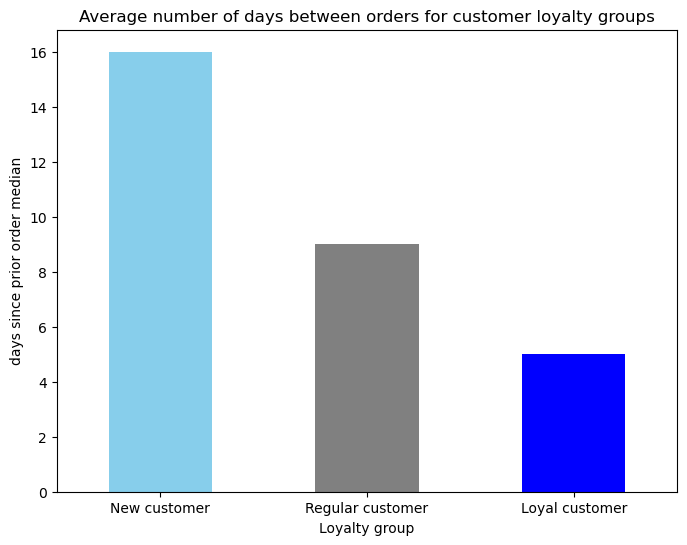

In [359]:
# Calculate the median of 'days_since_prior_order' for each group
group_medians = df_merged.groupby('loyalty_flag')['days_since_prior_order'].median()

# Plot the bar chart
fig8 = group_medians.plot(kind='bar', color=['skyblue', 'gray', 'blue'], figsize=(8, 6))

plt.title('Average number of days between orders for customer loyalty groups')
plt.xlabel('Loyalty group')
plt.ylabel('days since prior order median')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.show()

In [378]:
fig8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_frequency.png'), bbox_inches='tight')

Loyal customers make purchases more frequently than regular or new customers.

In [365]:
# Do loyal customers show different pattern of buying from various departments?

In [367]:
# Create crosstab loyalty vs departments
loyalty_dept_cross = pd.crosstab(df_merged['department'], df_merged['loyalty_flag'], dropna = False)

Text(0.5, 0, 'Product count')

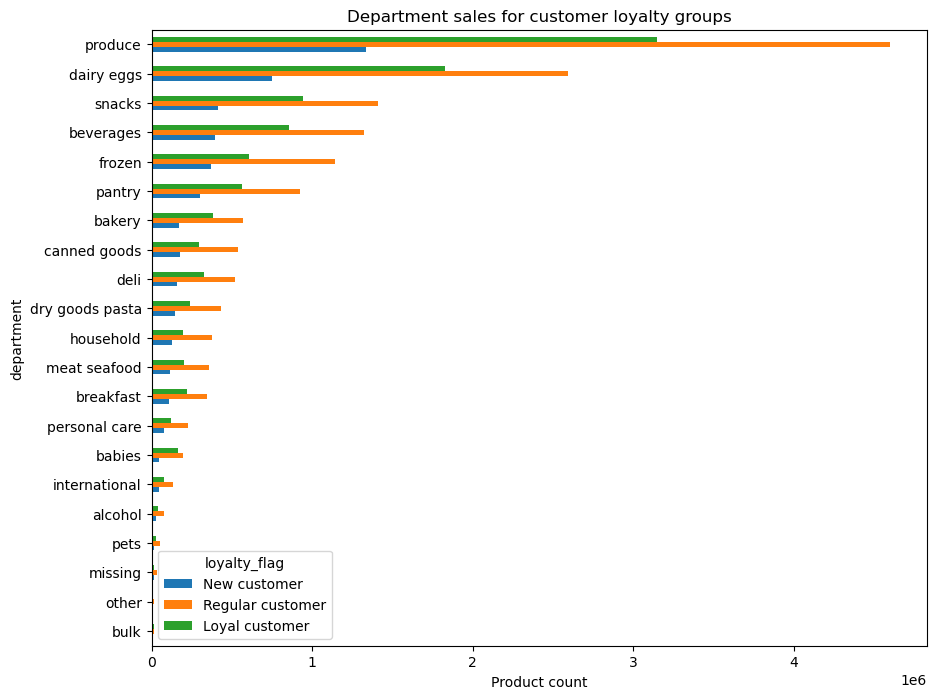

In [371]:
# Create loyalty vs departments bar chart
loyalty_dept_bar = loyalty_dept_cross.sort_values('Regular customer').plot(kind = 'barh', figsize=(10,8))
plt.title('Department sales for customer loyalty groups')
plt.xlabel('Product count')


In [380]:
loyalty_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_frequency.png'), bbox_inches='tight')

Although there are some small differences in the patterns of buying from different departments, for all loyalty groups produce, dairy/eggs and snacks are the top 3 popular departments. 

# 8 Exporting data

In [60]:
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged_database_final.pkl'))